In [ ]:
!mkdir data
!wget http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip -P ./data/
!wget http://images.cocodataset.org/zips/train2014.zip -P ./data/
!wget http://images.cocodataset.org/zips/val2014.zip -P ./data/

In [8]:
from pycocotools.coco import COCO

In [9]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [10]:
dataDir = './data'
dataType = 'val2014'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

In [13]:
# instance annotationsのためのCOCO APIの初期化
coco = COCO(annFile)

loading annotations into memory...
Done (t=5.25s)
creating index...
index created!


In [14]:
coco

In [16]:
# COCOカテゴリとスーパーカテゴリを表示
cats = coco.loadCats(coco.getCatIds())

In [17]:
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [18]:
nms = [cat['name'] for cat in cats]

In [21]:
len(nms)

80

In [20]:
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [22]:
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO supercategories: 
animal food indoor sports kitchen accessory outdoor person appliance furniture electronic vehicle


In [24]:
# 与えたカテゴリを含む全ての画像を取得し、1つをランダムに表示
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])

In [25]:
catIds

[1, 18, 41]

In [26]:
imgIds = coco.getImgIds(catIds=catIds)

In [27]:
imgIds

[438915,
 209028,
 549220,
 500100,
 231240,
 255209,
 372874,
 28842,
 353644,
 241837,
 279278,
 282768,
 360595,
 366484,
 45175,
 449560,
 493020,
 547421,
 324158]

In [28]:
imgIds = coco.getImgIds(imgIds=[324158])

In [29]:
imgIds

[324158]

In [32]:
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

In [33]:
img

{'license': 1,
 'file_name': 'COCO_val2014_000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

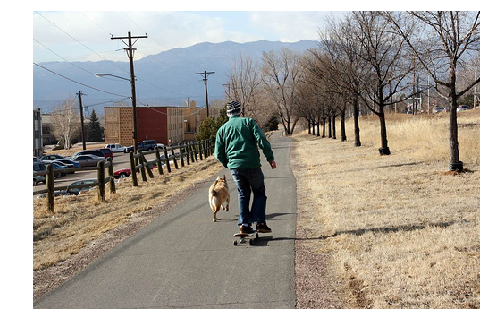

In [36]:
# 画像をロードして表示
I = io.imread('%s/%s/%s' % (dataDir, dataType, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

In [46]:
# instance annotationsを表示
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

In [47]:
annIds

[10673, 638724, 2162813]

In [48]:
anns = coco.loadAnns(annIds)

In [49]:
anns

[{'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    201.08,
    236.11,
    202.97,
    236.38,
    204.85,
    236.11,
    204.58,
    232.34,
    203.78,
    228.85,
    205.39,
    233.15,
    20

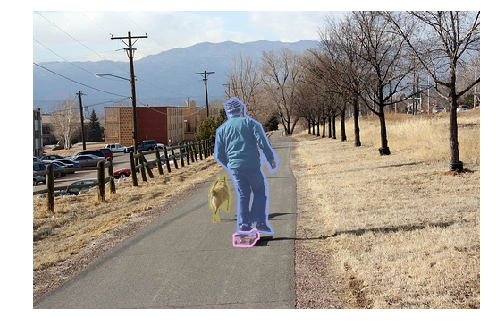

In [51]:
plt.imshow(I)
plt.axis('off')
coco.showAnns(anns)

In [52]:
# person keypoints annotationsを表示
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir, dataType)
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=1.87s)
creating index...
index created!


In [53]:
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

In [54]:
annIds

[2162813]

In [55]:
anns = coco_kps.loadAnns(annIds)

In [56]:
anns

[{'segmentation': [[228.43,
    247.9,
    229.63,
    206.62,
    224.24,
    191.07,
    220.65,
    179.7,
    207.49,
    169.53,
    202.71,
    163.55,
    205.7,
    133.04,
    218.86,
    121.68,
    213.47,
    104.33,
    225.44,
    96.55,
    236.8,
    106.12,
    236.8,
    116.29,
    254.15,
    127.06,
    263.72,
    150.39,
    274.49,
    166.54,
    271.5,
    177.31,
    266.12,
    181.5,
    257.14,
    159.96,
    254.75,
    177.91,
    261.93,
    192.27,
    262.53,
    216.79,
    261.33,
    234.14,
    268.51,
    249.1,
    247.57,
    246.11,
    245.78,
    249.69,
    229.03,
    248.5]],
  'num_keypoints': 12,
  'area': 5999.5445,
  'iscrowd': 0,
  'keypoints': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   212,
   135,
   2,
   241,
   125,
   2,
   209,
   162,
   2,
   257,
   146,
   2,
   218,
   172,
   2,
   267,
   167,
   2,
   225,
   177,
   2,
   247,
   176,
   2,
   235,
   203,
   2,
   254,

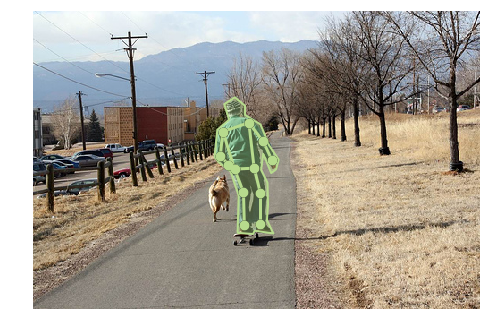

In [57]:
plt.imshow(I)
plt.axis('off')
coco_kps.showAnns(anns)

In [72]:
# caption annotationsを表示
annFile = '{}/annotations/captions_{}.json'.format(dataDir, dataType)
coco_caps = COCO(annFile)

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [73]:
len(coco_caps.anns.keys())

202654

In [70]:
coco_caps.anns[37]

{'image_id': 203564,
 'id': 37,
 'caption': 'A bicycle replica with a clock as the front wheel.'}

In [60]:
annIds = coco_caps.getAnnIds(imgIds=img['id'])

In [61]:
annIds

[310079, 311105, 311588, 312677, 312860]

In [62]:
anns = coco_caps.loadAnns(annIds)

In [63]:
anns

[{'image_id': 324158,
  'id': 310079,
  'caption': 'A man is skate boarding down a path and a dog is running by his side.'},
 {'image_id': 324158,
  'id': 311105,
  'caption': 'A man on a skateboard with a dog outside. '},
 {'image_id': 324158,
  'id': 311588,
  'caption': 'A person riding a skate board with a dog following beside.'},
 {'image_id': 324158,
  'id': 312677,
  'caption': 'This man is riding a skateboard behind a dog.'},
 {'image_id': 324158,
  'id': 312860,
  'caption': 'A man walking his dog on a quiet country road.'}]

In [64]:
coco_caps.showAnns(anns)

A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.
